In [2]:
import mpl_finance
import tushare as ts
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.pylab import date2num
import numpy as np
import matplotlib as mpl
import json
sns.set()
# 导入token
with open('./parameters.json','r') as f:
    p=json.load(f)
    token=p['TU_share_pro_taken']
ts.set_token(token)
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'SimHei'
pro = ts.pro_api()

df = pro.index_daily(ts_code='000001.SH', start_date='20170101')
df = df.sort_values(by='trade_date', ascending=True)
df['trade_date2'] = df['trade_date'].copy()
df['trade_date'] = pd.to_datetime(df['trade_date']).map(date2num)
df['dates'] = np.arange(0, len(df))
df.head()

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,trade_date2,dates
949,000001.SH,736332.0,3135.9208,3105.3085,3136.4558,3105.3085,3103.6373,32.2835,1.0402,141567187.0,159887139.4,20170103,0
948,000001.SH,736333.0,3158.7940,3133.7873,3160.1029,3130.1145,3135.9208,22.8732,0.7294,167860850.0,195914292.6,20170104,1
947,000001.SH,736334.0,3165.4109,3157.9063,3168.5021,3154.2810,3158.7940,6.6169,0.2095,174727645.0,199692026.7,20170105,2
946,000001.SH,736335.0,3154.3210,3163.7761,3172.0347,3153.0253,3165.4109,-11.0899,-0.3503,183708966.0,207296038.4,20170106,3
945,000001.SH,736338.0,3171.2362,3148.5317,3173.1360,3147.7351,3154.3210,16.9152,0.5363,171714075.0,192110579.3,20170109,4


In [3]:
df['5'] = df.close.rolling(5).mean()
df['20'] = df.close.rolling(20).mean()
df['30'] = df.close.rolling(30).mean()
df['60'] = df.close.rolling(60).mean()
df['120'] = df.close.rolling(120).mean()
df['250'] = df.close.rolling(250).mean()

Text(0.5,1,'上证综指K线图(2017.1-)')

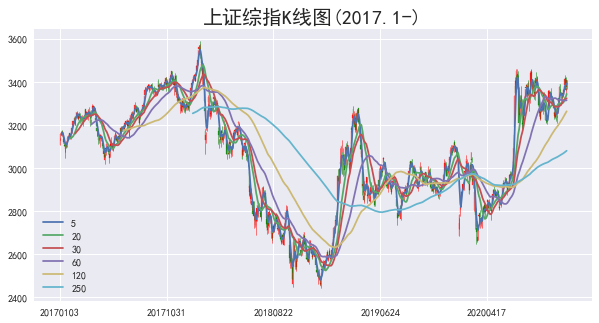

In [4]:
def format_date(x,pos):
    if x<0 or x>len(date_tickers)-1:
        return ''
    return date_tickers[int(x)]

date_tickers = df.trade_date2.values
fig, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
# 绘制K线图
mpl_finance.candlestick_ochl(
    ax=ax,
    quotes=df[['dates', 'open', 'close', 'high', 'low']].values,
    width=0.7,
    colorup='r',
    colordown='g',
    alpha=0.7)
# 绘制均线
for ma in ['5', '20', '30', '60', '120', '250']:
    plt.plot(df['dates'], df[ma])
plt.legend()
ax.set_title('上证综指K线图(2017.1-)', fontsize=20)

Text(0.5,1,'上证综指K线图(2018.6-)')

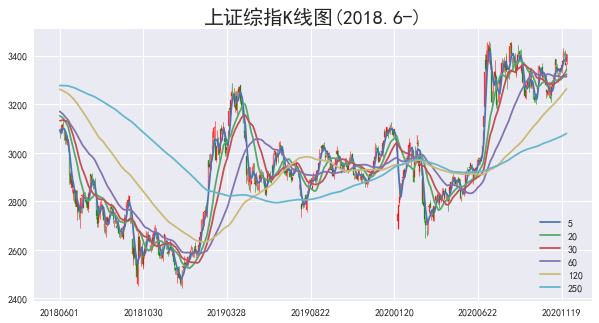

In [5]:
df2 = df.query('trade_date2 >= "20180601"').reset_index()
df2['dates'] = np.arange(0, len(df2))
date_tickers = df2.trade_date2.values

fig, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))

# 绘制K线图
mpl_finance.candlestick_ochl(
    ax=ax,
    quotes=df2[['dates', 'open', 'close', 'high', 'low']].values,
    width=0.7,
    colorup='r',
    colordown='g',
    alpha=0.7)

# 绘制均线
for ma in ['5', '20', '30', '60', '120', '250']:
    plt.plot(df2['dates'], df2[ma])
plt.legend()
ax.set_title('上证综指K线图(2018.6-)', fontsize=20)

Text(0,0.5,'成交量')

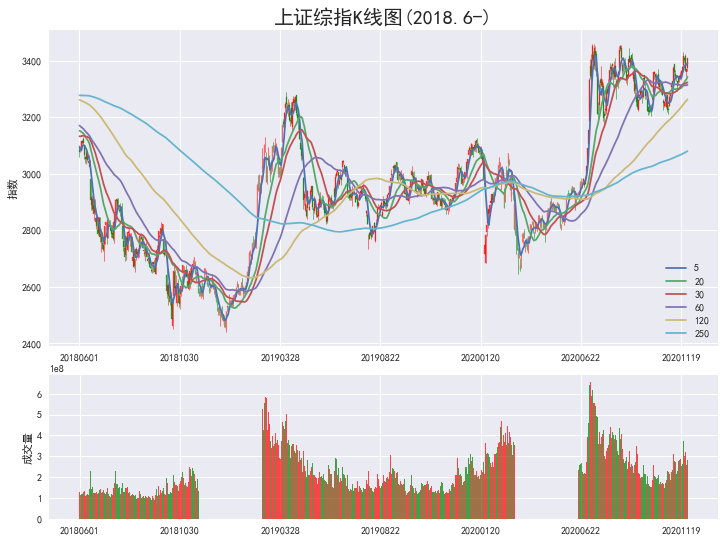

In [6]:
from matplotlib.gridspec import GridSpec

# 取18.9以来数据
df2 = df.query('trade_date2 >= "20180601"').reset_index()
df2['dates'] = np.arange(0, len(df2))
date_tickers = df2.trade_date2.values

# 控制子图
figure = plt.figure(figsize=(12, 9))
gs = GridSpec(3, 1)
ax1 = plt.subplot(gs[:2, :])
ax2 = plt.subplot(gs[2, :])

# 绘制K线图
mpl_finance.candlestick_ochl(
    ax=ax1,
    quotes=df2[['dates', 'open', 'close', 'high', 'low']].values,
    width=0.7,
    colorup='r',
    colordown='g',
    alpha=0.7)
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))

# 绘制均线
for ma in ['5', '20', '30', '60', '120', '250']:
    ax1.plot(df2['dates'], df2[ma])
ax1.legend()
ax1.set_title('上证综指K线图(2018.6-)', fontsize=20)
ax1.set_ylabel('指数')

# 绘制成交量
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
df2['up'] = df.apply(lambda row: 1 if row['close'] >= row['open'] else 0, axis=1)
ax2.bar(df2.query('up == 1')['dates'], df2.query('up == 1')['vol'], color='r', alpha=0.7)
ax2.bar(df2.query('up == 0')['dates'], df2.query('up == 0')['vol'], color='g', alpha=0.7)
ax2.set_ylabel('成交量')
#plt.xticks(date_tickers);